In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import sklearn

In [2]:
df = pd.read_excel("conint.xlsx")

In [3]:
# Length index list
id = np.arange(0, 10, 10/1001).tolist()
df.head()

,n at 1590 [s],n at 1600 [s],n at 1610[s]
0,0.080058,0.079318,0.078591
1,0.080068,0.079329,0.078601
2,0.080079,0.079339,0.078612
3,0.080090,0.079350,0.078622
4,0.080100,0.079360,0.078633


In [4]:
lst1 = df['n at 1590 [s]']
lst2 = df['n at 1600 [s]']
lst3 = df['n at 1610[s]']


In [5]:
m1 = [lst1.max(),
      id[int(df[['n at 1590 [s]']].idxmax())]]

m2 = [lst2.max(),
      id[int(df[['n at 1600 [s]']].idxmax())]]

m3 = [lst3.max(),
      id[int(df[['n at 1610[s]']].idxmax())]]

In [6]:
print(f"The maximum n at 1590 [s] is {m1[0]} \
[#crystals/L/V] with length {m1[1]} [mm]")

print(f"The maximum n at 1600 [s] is {m2[0]} \
[#crystals/L/V] with length {m2[1]} [mm]")

print(f"The maximum n at 1610 [s] is {m3[0]} \
[#crystals/L/V] with length {m3[1]} [mm]")


The maximum n at 1590 [s] is 0.092175186 [#crystals/L/V] with length 9.99000999000999 [mm]
The maximum n at 1600 [s] is 0.09122663 [#crystals/L/V] with length 9.99000999000999 [mm]
The maximum n at 1610 [s] is 0.0902967 [#crystals/L/V] with length 9.99000999000999 [mm]


In [8]:
Crystal_size = [m1[0], m2[0], m3[0]]
Length = [m1[1], m2[1], m3[1]]
growrate = [0.06975067, 0.06968592, 0.06962188] # [mm/s]

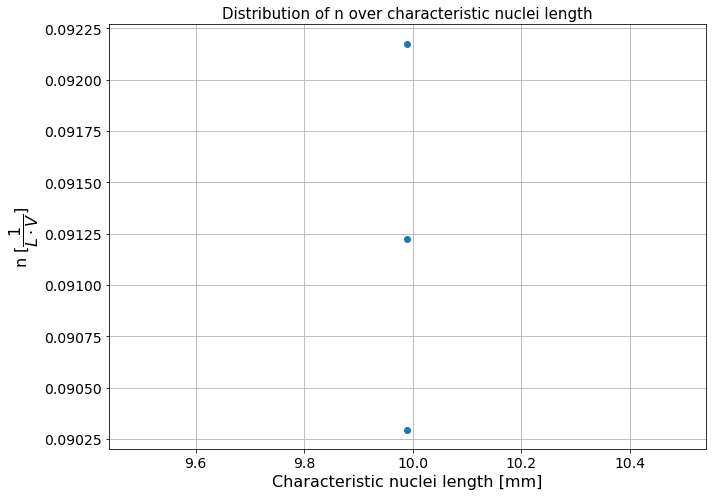

In [18]:
(fig, ax1) = plt.subplots(1, figsize=(10, 7))

ax1.scatter(Length, Crystal_size) 
#ax1.scatter(Length, growrate)
ax1.set_xlabel(r'Characteristic nuclei length [mm]',fontsize=16)
#ax1.set_ylabel(r'Growth rate [mm/s]',fontsize=16)
ax1.set_ylabel(r'n $[\dfrac{1}{L \cdot V}]$',fontsize=16)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
#ax1.legend(loc='upper right',fontsize=12)
ax1.grid(True)

plt.title('Distribution of n over characteristic nuclei length', fontsize=15)
#plt.title('Distribution of grow rate over characteristic nuclei length', fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')

alpha: -895.9862122596248, beta: 89.6951954314708

The equation of the growth rate versus characteristic length: G = -895.9862122596248 + 89.6951954314708 * L


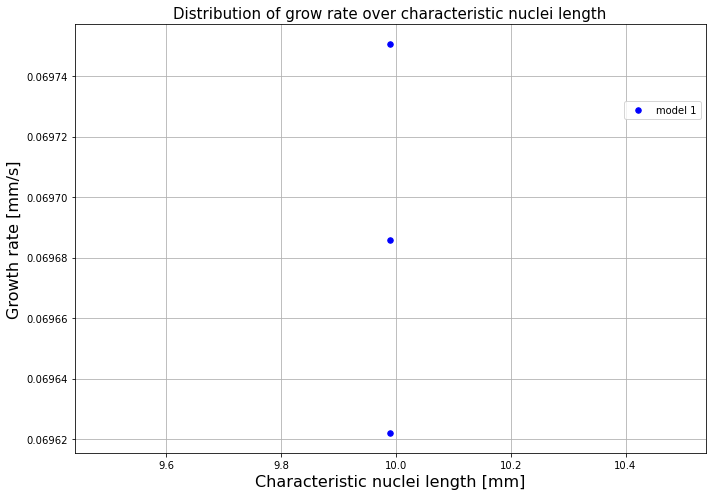